# Linear regression

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## Dummy data for Linear regression

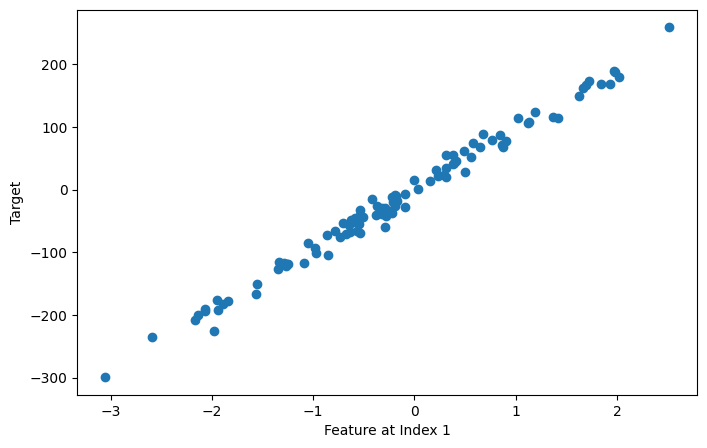

In [4]:
# Generate a regression problem
X, y = make_regression(
    n_samples=100,
    n_features=2,
    n_informative=2,
    noise = 10,
    random_state=25
    )

# Visualize feature at index 1 vs target
plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 1], y, marker='o')
plt.xlabel("Feature at Index 1")
plt.ylabel("Target")
plt.show()

### Linear Regression with Normal Equation

In [5]:
# adds x0 = 1 to each instance
X_b = np.concatenate([np.ones((len(X), 1)), X], axis=1)

# calculate normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# best values for theta
intercept, *coef = theta_best
print(f"Intercept: {intercept}\n\
Coefficients: {coef}")

Intercept: 0.35921242677977794
Coefficients: [6.129199175400593, 96.44309685893134]


In [6]:
# making a new sample
new_sample = np.array([[-2, 0.25]])
# adding a bias term to the instance
new_sample_b = np.concatenate([np.ones((len(new_sample), 1)), new_sample], axis=1)
# predicting the value of our new sample
new_sample_pred = new_sample_b.dot(theta_best)
print(f"Prediction: {new_sample_pred}")
Prediction: [12.21158829]

Prediction: [12.21158829]


### Comparing my implementation of LR with scikit-learn's

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print(f"Intercept: {lr.intercept_}\n\
Coefficients: {lr.coef_}")
print(f"Prediction: {lr.predict(new_sample)}")

Intercept: 0.3592124267797807
Coefficients: [ 6.12919918 96.44309686]
Prediction: [12.21158829]


### My implementation of Linear Regression with Gradient Descent

In [37]:
def linear_regression_gradient_descent(X: np.ndarray, y: np.ndarray, alpha: float, num_iterations: int) -> np.ndarray:
    m, n = X.shape
    X_b = np.concatenate([np.ones((len(X), 1)), X], axis=1)
    
    y = y.reshape(-1,1)
    
    theta = np.zeros((n+1, 1))
    
    for _ in range(num_iterations):
        predictions = X_b @ theta
        gradient = (1/m) * X_b.T @ (predictions - y)
        theta = theta - alpha * gradient

    theta = np.round(theta.flatten(), 4)
    return theta

In [41]:
X = np.array([[1, 1], [1, 2], [2, 3]])
y = np.array([1, 2, 3])
alpha = 0.01
iterations = 1000

result = linear_regression_gradient_descent(X, y, alpha, num_iterations)

intercept, *coef = result
print(f"Bias/Intercept: {intercept}\n\
Coefficients: {coef}")


Bias/Intercept: 0.031
Coefficients: [0.2487, 0.8242]
